# 201700949 설재혁

# 1. SL과 PL의 시각화

In [12]:
import pandas
from sklearn.datasets import load_iris

iris = load_iris()
irisdf = pandas.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target']= iris.target
irisdf['target'] = irisdf['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
irisdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


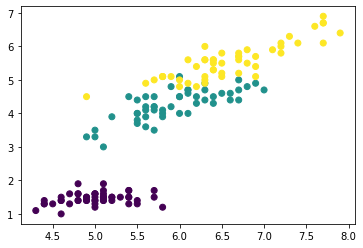

In [23]:
import matplotlib.pyplot as plt

SL = irisdf.iloc[:, 0]
SW = irisdf.iloc[:, 1]
PL = irisdf.iloc[:, 2]
PW = irisdf.iloc[:, 3]
name = irisdf.iloc[:, 4]
plt.scatter(SL, PL, c=iris.target)
plt.show()

# 2.1 붓꽃 종류에 따른 평균 데이터 (1)

In [133]:
# 붓꽃 종류에 따라 평균 내는 함수
def averageSL(df):
    All = df.loc[:, ['sepal length (cm)']] # SL의 모든 데이터를 가져오고

    seaRes = 0 # seatosa의 결과값을 저장할 변수
    verRes = 0 # versicolor의 결과값을 저장할 변수
    virRes = 0 # virginica의 결과값을 저장할 변수

    for i in range(len(All) - 1):
        # seatosa일 경우 = index 0 ~ 49
        if(i < 50):  
            seaRes += All.iloc[i]
        # versicolor일 경우 = index 50 ~ 99   
        elif(i < 100):
            verRes += All.iloc[i]
        # virginica일 경우 = index 100 ~ 149
        else:
            virRes += All.iloc[i]
    return [seaRes/50, verRes/50, virRes/50] # 각각 50개이므로 50으로 나눠 평균 값 리턴

# 아래 함수들 모두 동일하게 작성
def averageSW(df):
    All = df.loc[:, ['sepal width (cm)']]

    seaRes = 0
    verRes = 0
    virRes = 0

    for i in range(len(All) - 1):
        if(i < 50):
            seaRes += All.iloc[i]
        elif(i < 100):
            verRes += All.iloc[i]
        else:
            virRes += All.iloc[i]
    return [seaRes/50, verRes/50, virRes/50]

def averagePL(df):
    All = df.loc[:, ['petal length (cm)']]

    seaRes = 0
    verRes = 0
    virRes = 0

    for i in range(len(All) - 1):
        if(i < 50):
            seaRes += All.iloc[i]
        elif(i < 100):
            verRes += All.iloc[i]
        else:
            virRes += All.iloc[i]
    return [seaRes/50, verRes/50, virRes/50]

def averagePW(df):
    All = df.loc[:, ['petal width (cm)']]

    seaRes = 0
    verRes = 0
    virRes = 0

    for i in range(len(All) - 1):
        if(i < 50):
            seaRes += All.iloc[i]
        elif(i < 100):
            verRes += All.iloc[i]
        else:
            virRes += All.iloc[i]
    return [seaRes/50, verRes/50, virRes/50]

SL = averageSL(irisdf) 
SW = averageSW(irisdf) 
PL = averagePL(irisdf) 
PW = averagePW(irisdf) 

inputData = {"target" : [irisdf.target[0],irisdf.target[50],irisdf.target[100]],
             "sepal length (cm)" : [SL[0].values[0], SL[1].values[0], SL[2].values[0]],
             "sepal width (cm)" : [SW[0].values[0], SW[1].values[0], SW[2].values[0]],
             "petal length (cm)" : [PL[0].values[0], PL[1].values[0], PL[2].values[0]],
             "petal width (cm)" : [PW[0].values[0], PW[1].values[0], PW[2].values[0]],
            }
inputFrame = pandas.DataFrame(inputData)
inputFrame

,target,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.470,2.914,5.450,1.990


# 붓꽃 종류에 따른 평균 데이터 (2)

In [292]:
averageData = irisdf.groupby('target').mean() # groupby를 통해 target으로 구별하여 평균값 도출
averageData 

pandas.core.frame.DataFrame

In [234]:
averageData1 = irisdf.groupby('target')["sepal length (cm)"].mean() # groupby를 통해 target으로 구별하여 SL의 평균값 도출
averageData1

target
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal length (cm), dtype: float64

# 2.2 시각화

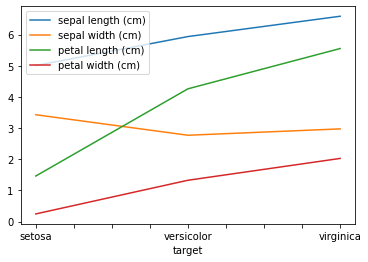

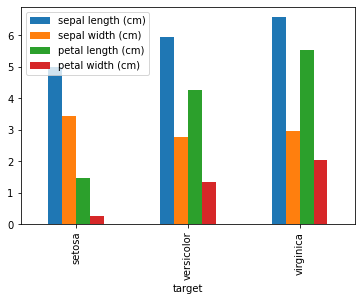

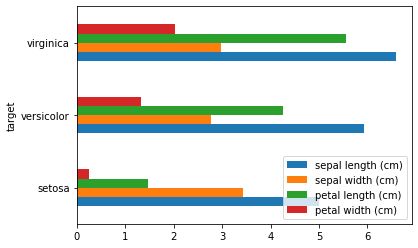

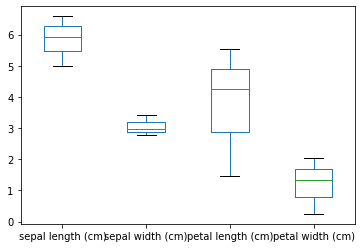

In [231]:
averageData.plot(kind='line')
averageData.plot(kind='bar')
averageData.plot(kind='barh')
averageData.plot(kind='box')
plt.show()

# 2.3 데이터를 가장 잘 나타내는 그래프
## : Bar Chart가 평균 데이터를 가장 구분하기 쉽게 나타내므로 데이터를 가장 잘 나타낸다고 생각한다.

# 3. 데이터셋 분할

In [321]:
from sklearn.model_selection import train_test_split
import csv

# 데이터셋 분리
data = iris['data']
target = iris['target']

# train_test_split 모듈을 통해 test set과 train set 분류
# test set의 비율은 default 값이 0.25이다. 이 말은 즉, 전체 데이터 셋의 25%를 테스트 set으로 지정하겠다는 말이다.
# stratify의 default 값은 None인데, startify 값을 target으로 해주면 각각의 class 비율을 train/validation에 유지해준다. 
# 즉, 한 쪽으로 쏠려서 분배되는 것을 방지해준다. 이 옵션을 설정하지 않고 classification 문제를 다뤘을 때, 성능의 차이가 많이 날 수 있다.
x_train, x_test, y_train, y_test = train_test_split(data, target, stratify=target)

# train_dataset.csv 파일로 만들기
train_df = pandas.DataFrame(x_train, y_train)
train_df.to_csv('train_dataset.csv', index=False)

# test_dataset.csv 파일로 만들기
test_df = pandas.DataFrame(x_test, y_test)
test_df.to_csv('test_dataset.csv', index=False)

# 4. 분할된 데이터셋 가시화 

Test            0
SL  5.694737
SW  2.986842
PL  3.594737
PW  1.136842


Train            0
SL  5.893750
SW  3.081250
PL  3.813393
PW  1.220536


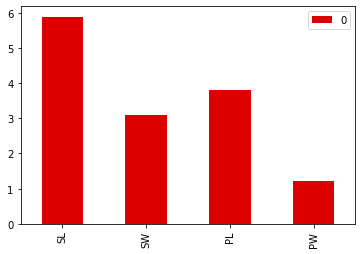

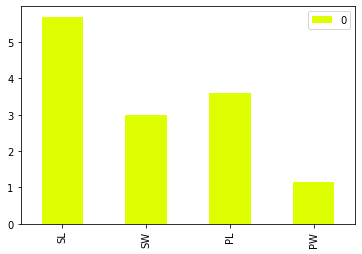

In [402]:
# dataset 불러오기
train = pandas.read_csv('train_dataset.csv')
test = pandas.read_csv('test_dataset.csv')

average_train = train.sum() / 112 # train 평균 구하기
average_test = test.sum() / 38 # test 평균 구하기

# train 평균 데이터 가시화
average_train_df = pandas.DataFrame(average_train)
avgTrain = average_train_df.rename(index={'0': 'SL', '1': 'SW', '2': 'PL', '3': 'PW'})
avgTrain.plot(kind='bar', color="#dd0000")

# test 평균 데이터 가시화
average_test_df = pandas.DataFrame(average_test)
avgTest = average_test_df.rename(index={'0': 'SL', '1': 'SW', '2': 'PL', '3': 'PW'})
avgTest.plot(kind='bar', color="#ddff00")

print("Test", avgTest)
print("\n")
print("Train", avgTrain)

 - Train data set과 Test dataset 사이의 미세한 차이가 있음을 알 수 있다.
 - Train data set이 Test dataset 보다 약간 큰 경향을 보인다.

# 201700949 설재혁